# **----- ANSWER = 1 -----**

# Important libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('/kaggle/input/lab-04/lab_04_datasets/Picture1.png', cv2.IMREAD_GRAYSCALE)

# Min filtering: use erosion 

In [3]:
kernel = np.ones((3, 3), np.uint8)
min_filtered = cv2.erode(img, kernel)

# Max filtering: use dilation (maximum in neighborhood)

In [4]:
max_filtered = cv2.dilate(img, kernel)

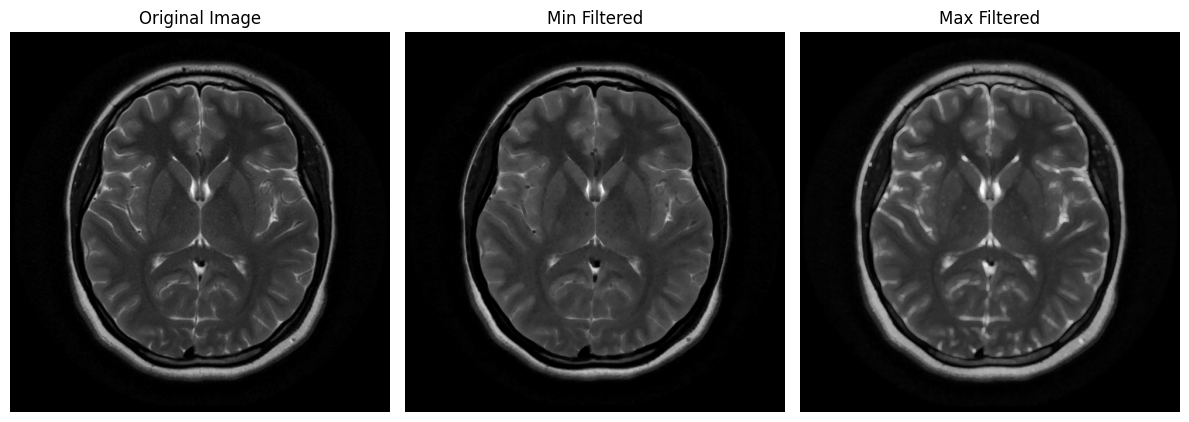

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Min Filtered")
plt.imshow(min_filtered, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Max Filtered")
plt.imshow(max_filtered, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# If I add noise and pepper

In [6]:
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_img = image.copy()
    total_pixels = image.size
    
  
    num_salt = int(total_pixels * salt_prob)
    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_img[salt_coords[0], salt_coords[1]] = 255
    
    
    num_pepper = int(total_pixels * pepper_prob)
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_img[pepper_coords[0], pepper_coords[1]] = 0
    
    return noisy_img

In [7]:

salt_prob = 0.02  
pepper_prob = 0.02  
noisy_img = add_salt_and_pepper_noise(img, salt_prob, pepper_prob)

# Min filter (erosion) to remove salt noise
# Max filter (dilation) to remove pepper noise

In [8]:
kernel = np.ones((3, 3), np.uint8)


min_filtered = cv2.erode(noisy_img, kernel)


max_filtered = cv2.dilate(noisy_img, kernel)


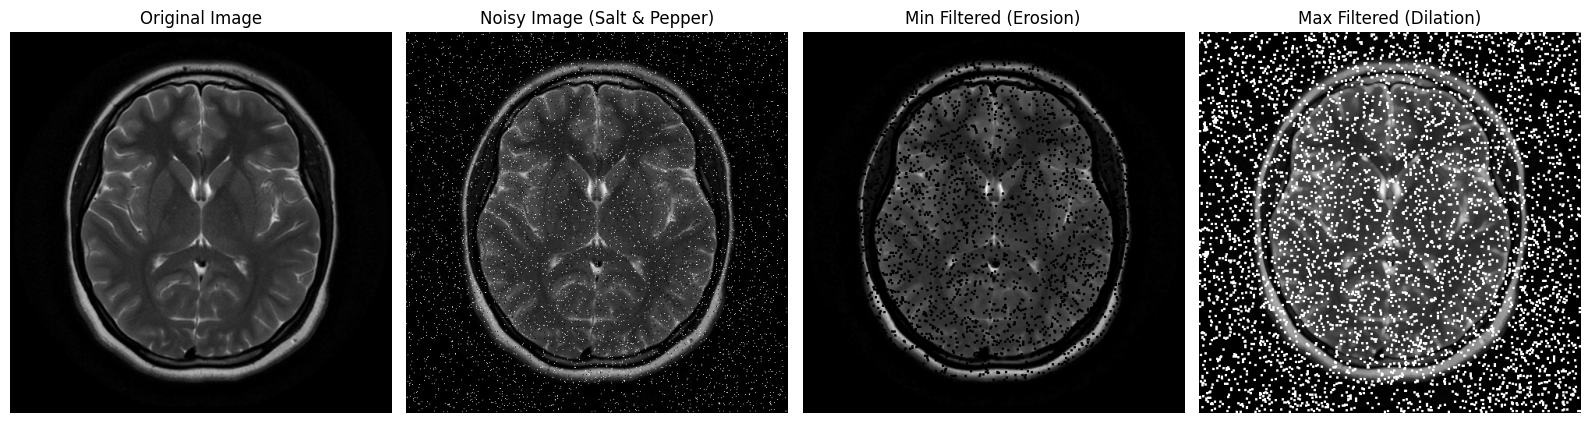

In [9]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Noisy Image (Salt & Pepper)")
plt.imshow(noisy_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Min Filtered (Erosion)")
plt.imshow(min_filtered, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Max Filtered (Dilation)")
plt.imshow(max_filtered, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# **----- ANSWER = 2 -----**

# Gaussuan 

In [19]:
def add_gaussian_noise(image,mean=0,var=1):
    sigma = var ** 0.5
    gaussian = np.random.normal(mean,sigma,image.shape)
    noisy_img = image + gaussian
    noisy_img = np.clip(noisy_img,0,255).astype(np.uint8)
    return noisy_img

In [20]:
noisy_img = add_gaussian_noise(img,mean=0,var=25)

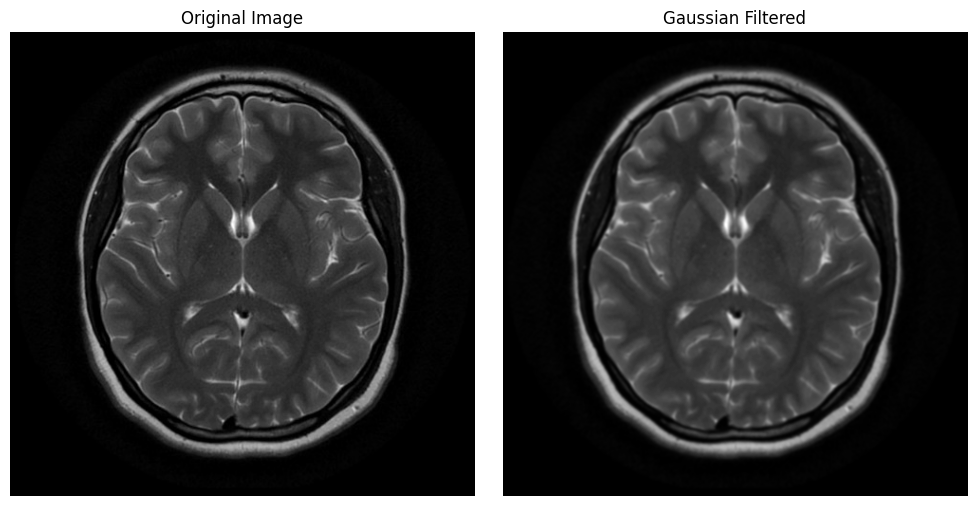

In [12]:
gaussian_filtered = cv2.GaussianBlur(img, (5, 5), 0)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Gaussian Filtered')
plt.imshow(gaussian_filtered, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

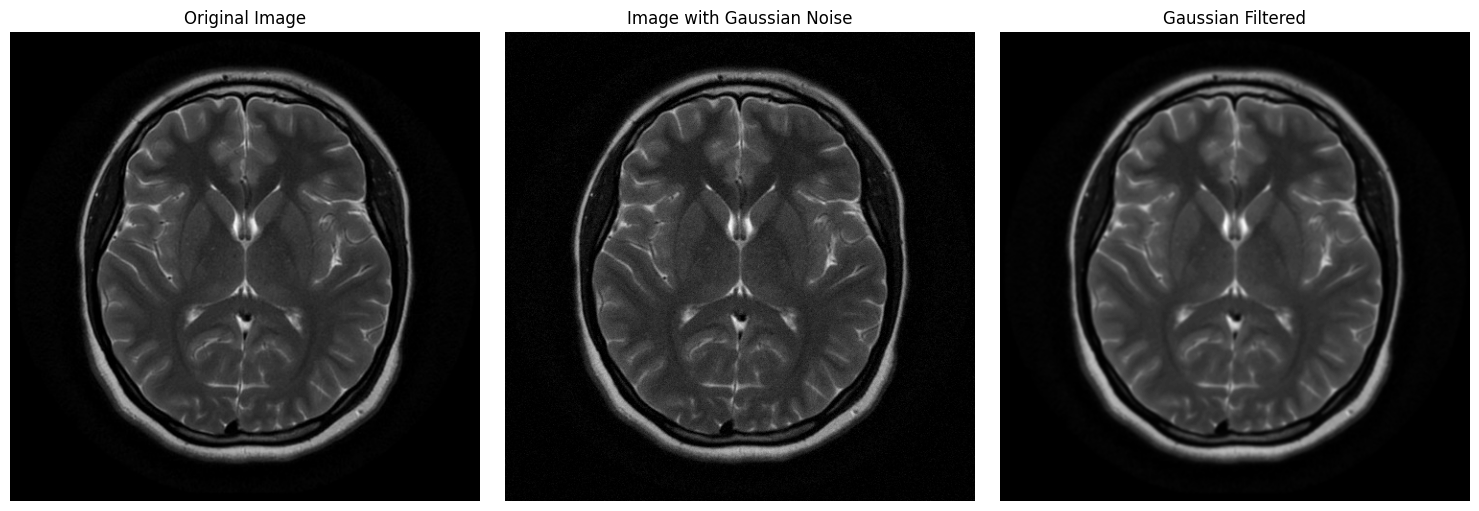

In [21]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Image with Gaussian Noise')
plt.imshow(noisy_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Gaussian Filtered')
plt.imshow(gaussian_filtered, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# ----- Answer = 3 -----

In [23]:
img_3 = cv2.imread('/kaggle/input/lab-04/lab_04_datasets/Picture3.png', cv2.IMREAD_GRAYSCALE)

# a) Box filtering (cv2.boxFilter with normalize=True)

In [25]:
box_filtered = cv2.boxFilter(img_3, ddepth=-1, ksize=(5, 5), normalize=True)

# b) Average Weighted filtering (Gaussian Blur)

In [26]:
weighted_filtered = cv2.GaussianBlur(img_3, (5, 5), sigmaX=1.5)

# c) Median filtering

In [30]:
median_filtered = cv2.medianBlur(img_3, ksize=5)

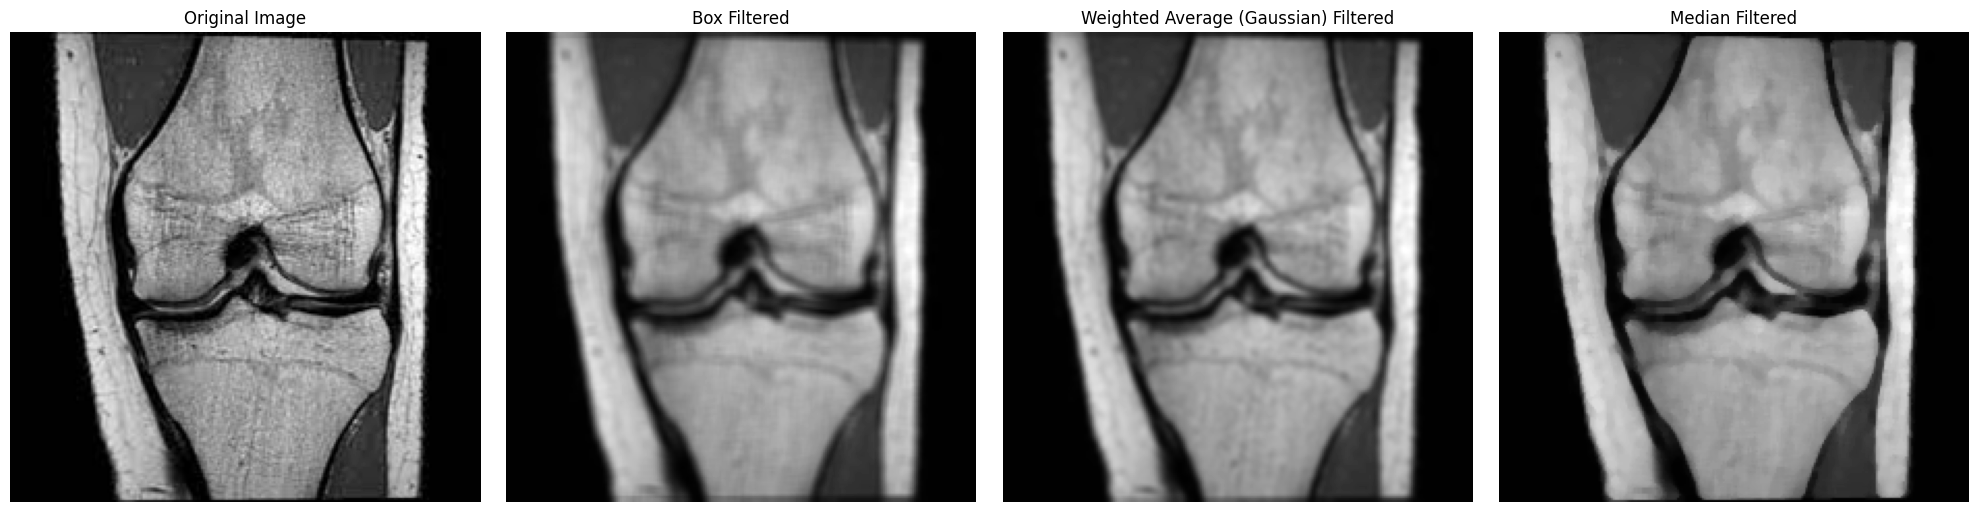

In [32]:
plt.figure(figsize=(20, 5))  

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(img_3, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Box Filtered')
plt.imshow(box_filtered, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Weighted Average (Gaussian) Filtered')
plt.imshow(weighted_filtered, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Median Filtered')
plt.imshow(median_filtered, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


# ----- Answer = 4 -----

# a) Read the image (grayscale for simplicity)

In [35]:
img_4 = cv2.imread('/kaggle/input/lab-04/lab_04_datasets/Picture4.png', cv2.IMREAD_GRAYSCALE)

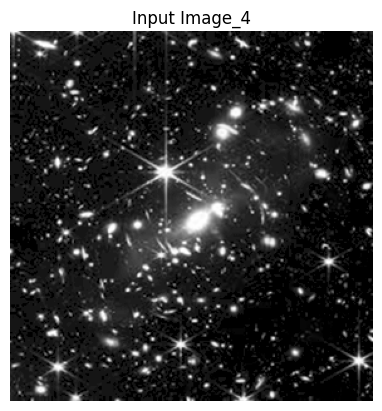

In [38]:
plt.imshow(img_4, cmap='gray')
plt.title('Input Image_4')
plt.axis('off')
plt.show()

# b) Show matrix form (print the numpy array)

In [39]:
print("Matrix form of the image (as numpy array):")
print(img_4)

Matrix form of the image (as numpy array):
[[235 245 252 ...  39  43  39]
 [160 203 239 ...  28  43  39]
 [ 76 137 207 ...  21  34  34]
 ...
 [ 39  34  28 ...   0  21  28]
 [ 39  34  28 ...   0   0   0]
 [ 39  34  28 ...   0   0   0]]


# d) Find the value of pixel at (10, 78)

In [40]:
pixel_value = img[10, 78]
print(f"Value of the pixel at (10, 78): {pixel_value}")

Value of the pixel at (10, 78): 28


# e) Show the size of the image (height, width)

In [41]:
height, width = img.shape
print(f"Size of the image: Height = {height}, Width = {width}")

Size of the image: Height = 295, Width = 289


# f) Show all information about the image

In [42]:
print("\nFull image information:")
print(f"Shape (Height, Width): {img.shape}")
print(f"Data type: {img.dtype}")
print(f"Number of dimensions: {img.ndim}")
print(f"Min pixel value: {img.min()}")
print(f"Max pixel value: {img.max()}")
print(f"Mean pixel value: {img.mean()}")


Full image information:
Shape (Height, Width): (295, 289)
Data type: uint8
Number of dimensions: 2
Min pixel value: 0
Max pixel value: 255
Mean pixel value: 35.1648818251129


# ----- Answer 5 -----

In [68]:
from PIL import Image

In [69]:
rgb_path = '/kaggle/input/lab-04/lab_04_datasets/Picture5.png'
grayscale_path = '/kaggle/input/lab-04/lab_04_datasets/Picture6.png'
indexed_path = '/kaggle/input/lab-04/lab_04_datasets/Picture7.png'  

# a) Read and show all images

In [47]:
rgb_img_bgr = cv2.imread(rgb_path)
rgb_img = cv2.cvtColor(rgb_img_bgr, cv2.COLOR_BGR2RGB)


gray_img = cv2.imread(grayscale_path, cv2.IMREAD_GRAYSCALE)
indexed_img_pil = Image.open(indexed_path)
indexed_img_array = np.array(indexed_img_pil)

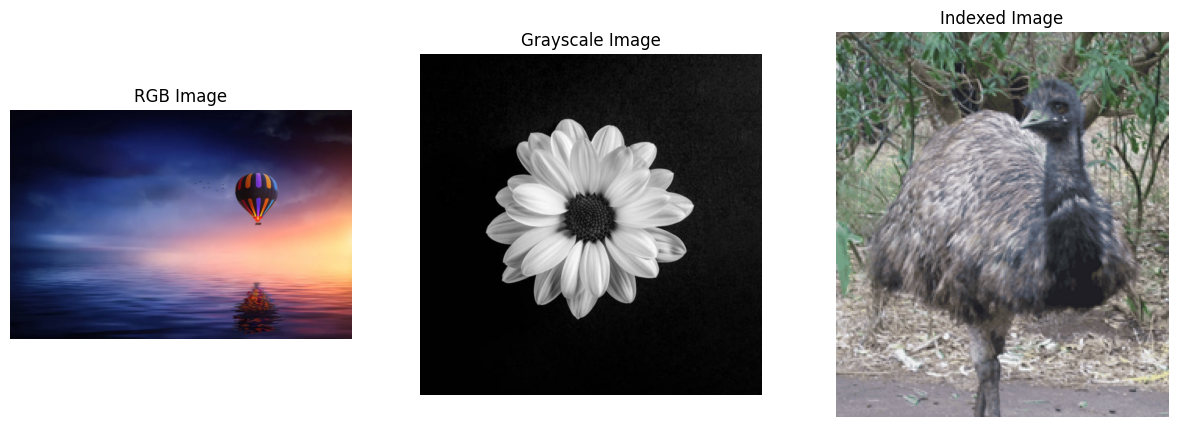

In [70]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('RGB Image')
plt.imshow(rgb_img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Grayscale Image')
plt.imshow(gray_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Indexed Image')
plt.imshow(indexed_img_array, cmap='gray')  
plt.axis('off')

plt.show()

# b) Convert RGB image to Grayscale

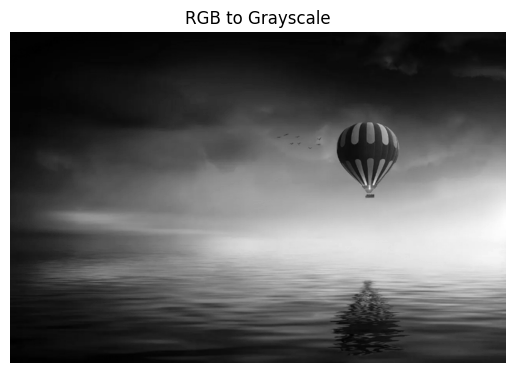

In [71]:
rgb_to_gray = cv2.cvtColor(rgb_img_bgr, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.title('RGB to Grayscale')
plt.imshow(rgb_to_gray, cmap='gray')
plt.axis('off')
plt.show()

# c) Convert Indexed image to Grayscale

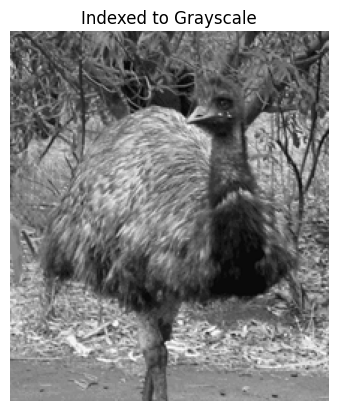

In [72]:
indexed_to_gray_pil = indexed_img_pil.convert('L')
indexed_to_gray = np.array(indexed_to_gray_pil)
plt.figure()
plt.title('Indexed to Grayscale')
plt.imshow(indexed_to_gray, cmap='gray')
plt.axis('off')
plt.show()

# d) Convert Indexed image to RGB

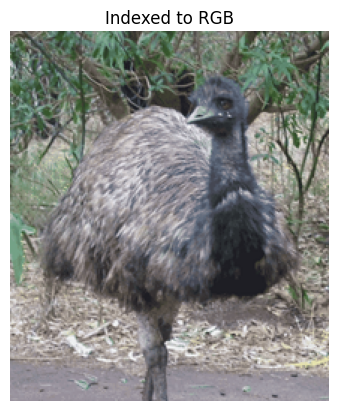

In [73]:
indexed_to_rgb_pil = indexed_img_pil.convert('RGB')  
indexed_to_rgb = np.array(indexed_to_rgb_pil)

plt.figure()
plt.title('Indexed to RGB')
plt.imshow(indexed_to_rgb)
plt.axis('off')
plt.show()


# e) Convert Grayscale image to Binary (thresholding)

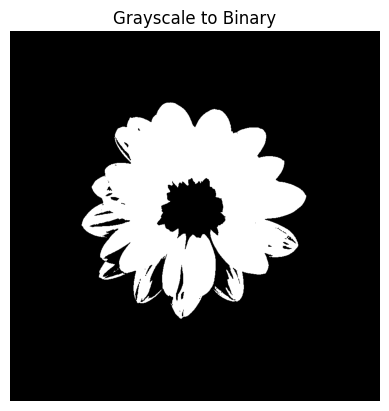

In [74]:
_, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
plt.figure()
plt.title('Grayscale to Binary')
plt.imshow(binary_img, cmap='gray')
plt.axis('off')
plt.show()

# f) Invert Binary image

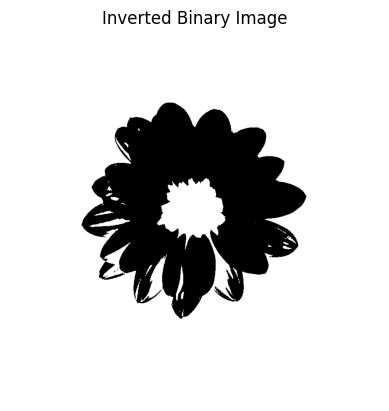

In [75]:
binary_inverted = cv2.bitwise_not(binary_img)
plt.figure()
plt.title('Inverted Binary Image')
plt.imshow(binary_inverted, cmap='gray')
plt.axis('off')
plt.show()

# g) Show histogram of Grayscale image

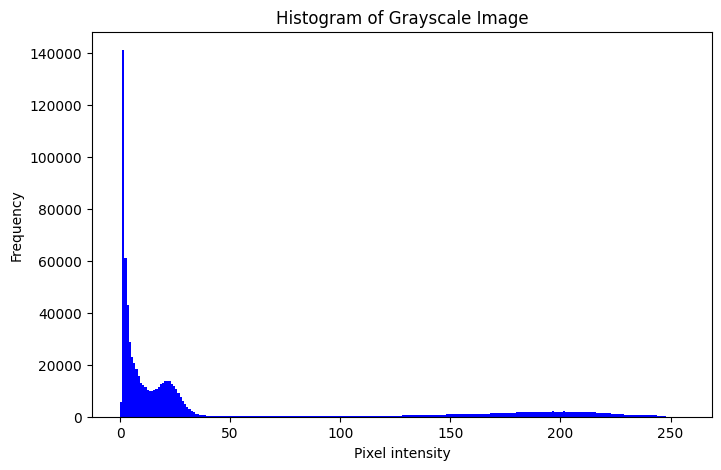

In [77]:

plt.figure(figsize=(8,5))
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.hist(gray_img.ravel(), bins=256, range=[0,256], color='blue')
plt.show()

# h) Invert RGB image (color negative)

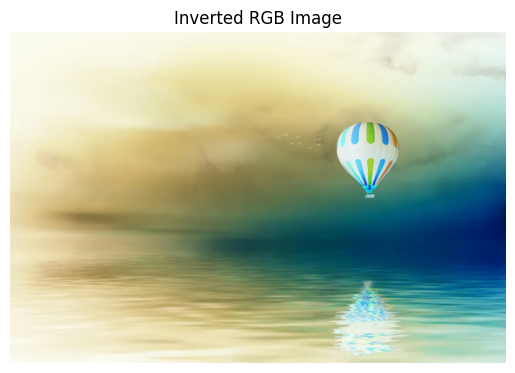

In [78]:
rgb_inverted = 255 - rgb_img
plt.figure()
plt.title('Inverted RGB Image')
plt.imshow(rgb_inverted)
plt.axis('off')
plt.show()

# i) Blur the RGB image (Gaussian blur)

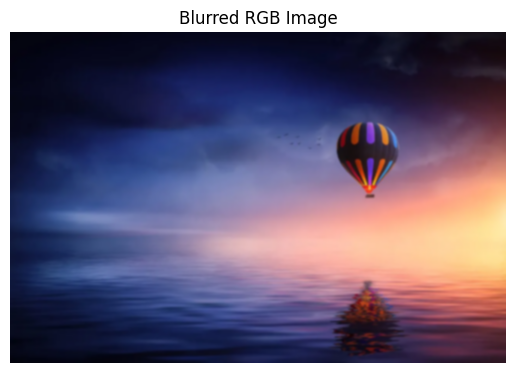

In [80]:
rgb_blurred = cv2.GaussianBlur(rgb_img_bgr, (7,7), 0)
rgb_blurred = cv2.cvtColor(rgb_blurred, cv2.COLOR_BGR2RGB)
rgb_blurred = cv2.GaussianBlur(rgb_img_bgr, (7,7), 0)
rgb_blurred = cv2.cvtColor(rgb_blurred, cv2.COLOR_BGR2RGB)
plt.figure()
plt.title('Blurred RGB Image')
plt.imshow(rgb_blurred)
plt.axis('off')
plt.show()

# Display all results for b) to i)

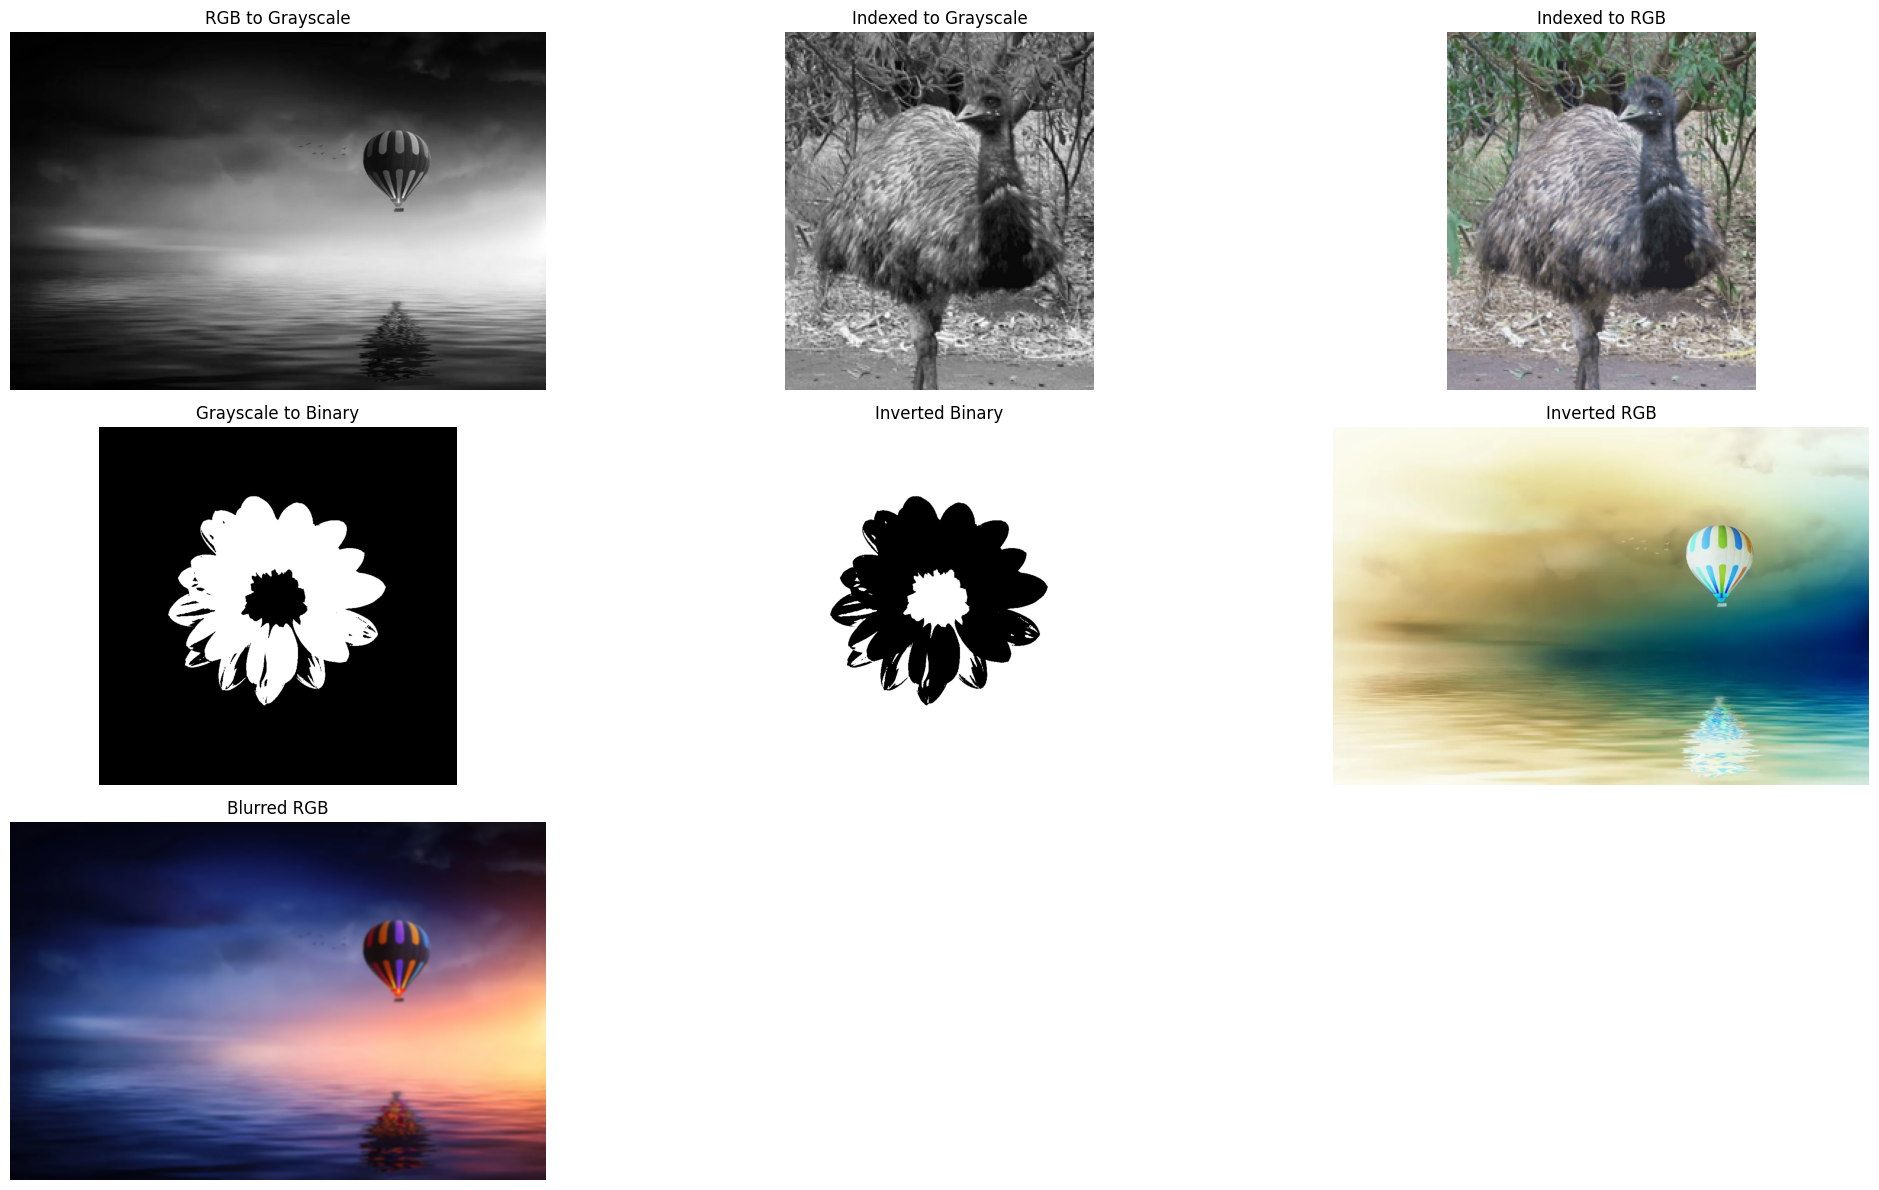

In [58]:
plt.figure(figsize=(20, 12))

plt.subplot(3, 3, 1)
plt.title('RGB to Grayscale')
plt.imshow(rgb_to_gray, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title('Indexed to Grayscale')
plt.imshow(indexed_to_gray, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title('Indexed to RGB')
plt.imshow(indexed_to_rgb)
plt.axis('off')

plt.subplot(3, 3, 4)
plt.title('Grayscale to Binary')
plt.imshow(binary_img, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.title('Inverted Binary')
plt.imshow(binary_inverted, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.title('Inverted RGB')
plt.imshow(rgb_inverted)
plt.axis('off')

plt.subplot(3, 3, 7)
plt.title('Blurred RGB')
plt.imshow(rgb_blurred)
plt.axis('off')

plt.tight_layout()
plt.show()